# Random Forest


## Background reading:

**Suggested Reading:**

*Intro to Statistical Learning*: 8.2 Bagging, Random Forests, Boosting, and Bayesian Additive Regression Trees, 
8.2.1 Bagging (Page 343-345, up to Out-of-Bag Error Estimation), 
8.2.2 Random Forests, 
8.2.3 Boosting

## Dataset:
The example uses the *Titanic* dataset from kaggle [link](https://www.kaggle.com/datasets/yasserh/titanic-dataset)

In [843]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
#import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [845]:
# Load the dataset 
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [847]:
# Check the null values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [849]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [851]:
# Handle the missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [855]:
# Encode 'Sex' and 'Embarked' columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [857]:
# Define predictors (x) and target (y)
x = df.drop('Survived', axis=1)
y = df['Survived']


In [859]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [861]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)

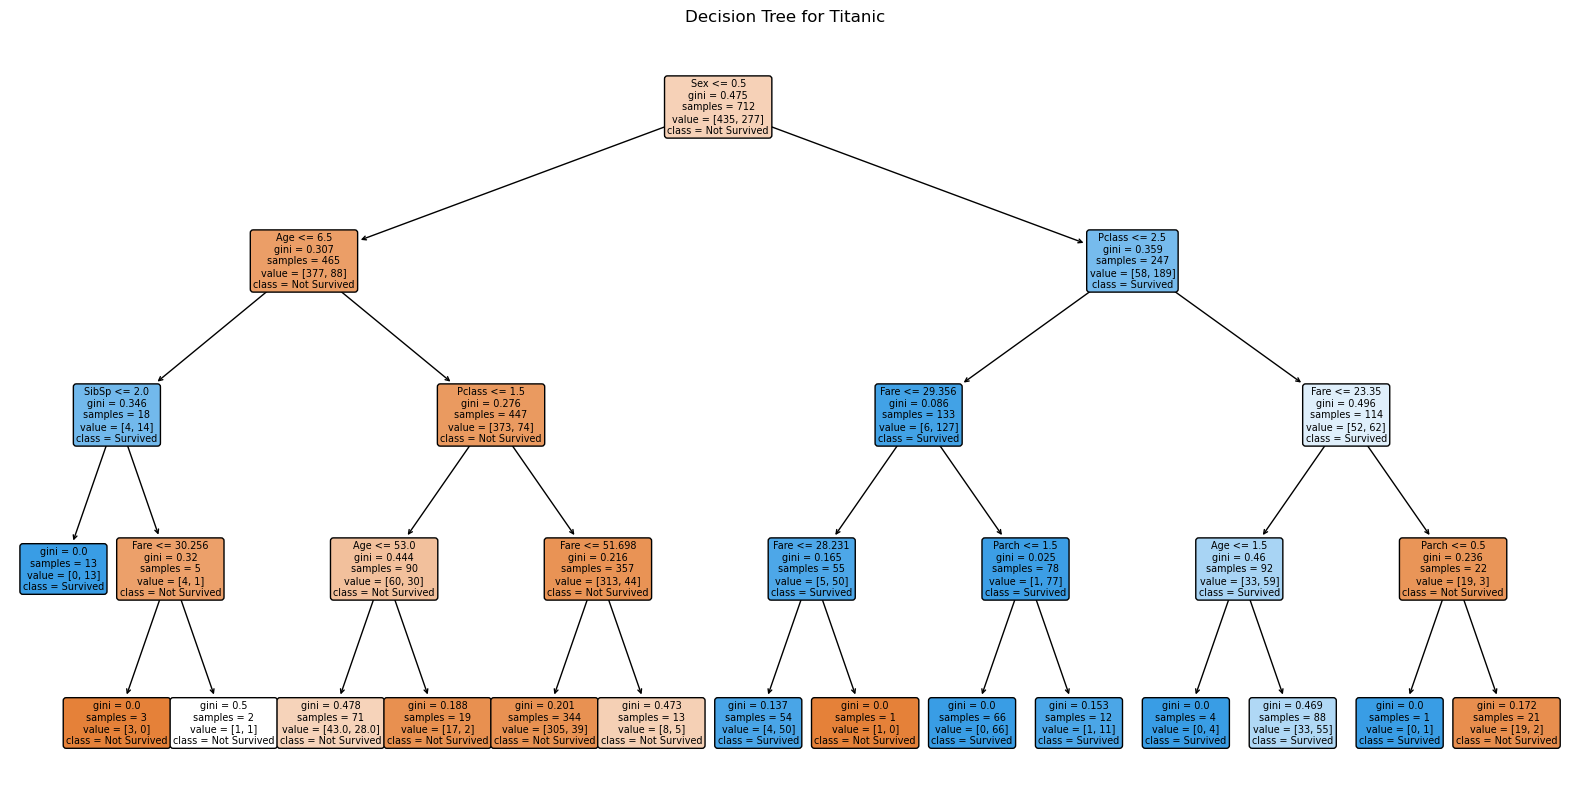

In [863]:
# Plot the decision tree
plt.figure(figsize=(20,10))  
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title("Decision Tree for Titanic")
plt.show()

In [864]:
# Predict on the test set
y_pred_clf = clf.predict(x_test)

# Evaluate the model
clf_accuracy = accuracy_score(y_test, y_pred_clf)*100
print('Accuracy of the Decision Tree Classification Model: {:.4f}%'.format(clf_accuracy))


Accuracy of the Decision Tree Classification Model: 78.7709%


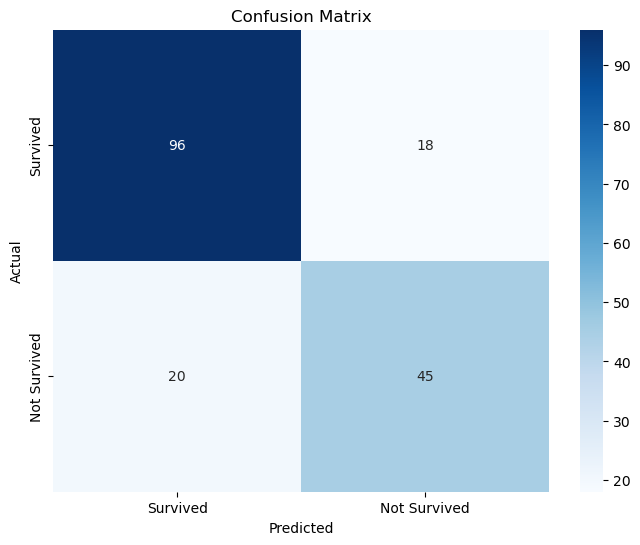

In [865]:
# Confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'Not Survived'], 
            yticklabels=['Survived', 'Not Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [875]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)


RandomForestClassifier()

In [877]:
# Predict on the test set
y_pred_rf = rf.predict(x_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)*100
print('Accuracy of the Random Forest Model: {:.4f}%'.format(rf_accuracy))


Accuracy of the Random Forest Model: 81.0056%


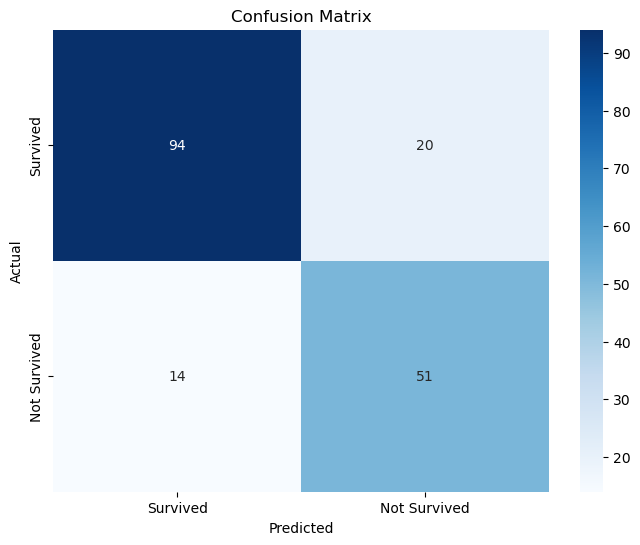

In [879]:
# Confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'Not Survived'], 
            yticklabels=['Survived', 'Not Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()